<a href="https://colab.research.google.com/github/MohamedMohy01/seam-carving-Algorithm-Assignment/blob/main/seam_carving_Algorithm_120210268_120210302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project seam carving Algorithm
Group Names:
- Mohamed Mohy Mahmoud - 120210268
- Yahia Ali Othman - 120210302



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving input2.jpg to input2.jpg


<ipython-input-13-2d39380afd78>:40: RuntimeWarning: overflow encountered in scalar add
  cost[i, j] += min_val


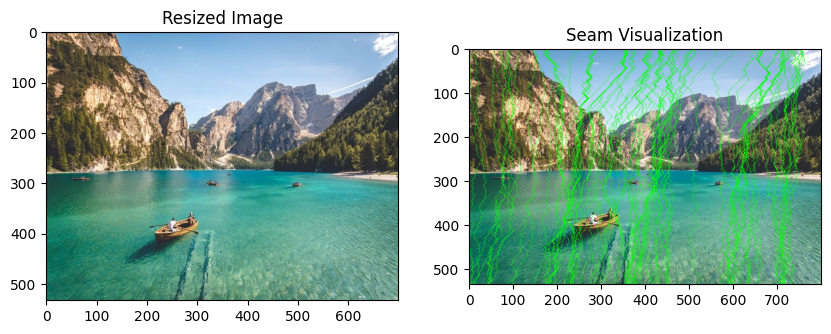

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def energy_function(image):
    """Computes energy map using manual convolution instead of Sobel."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define Sobel-like kernels manually
    kernel_x = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]], dtype=np.float32)

    kernel_y = np.array([[-1, -2, -1],
                          [0,  0,  0],
                          [1,  2,  1]], dtype=np.float32)

    # Apply convolution manually using filter2D
    grad_x = cv2.filter2D(gray, -1, kernel_x)
    grad_y = cv2.filter2D(gray, -1, kernel_y)

    # Compute energy map
    energy = np.abs(grad_x) + np.abs(grad_y)
    return energy

def find_seam(energy):
    """Finds the seam with the least energy."""
    h, w = energy.shape
    seam = np.zeros(h, dtype=np.int32)
    cost = energy.copy()

    # Compute the minimum cost path
    for i in range(1, h):
        for j in range(w):
            min_val = cost[i-1, j]
            if j > 0:
                min_val = min(min_val, cost[i-1, j-1])
            if j < w - 1:
                min_val = min(min_val, cost[i-1, j+1])
            cost[i, j] += min_val

    # Backtrack to find the seam
    seam[-1] = np.argmin(cost[-1])
    for i in range(h-2, -1, -1):
        j = seam[i+1]
        if j > 0 and cost[i, j-1] == min(cost[i, max(0, j-1):min(w, j+2)]):
            seam[i] = j - 1
        elif j < w-1 and cost[i, j+1] == min(cost[i, max(0, j-1):min(w, j+2)]):
            seam[i] = j + 1
        else:
            seam[i] = j

    return seam

def remove_seam(image, seam):
    """Removes the seam from the image."""
    h, w, _ = image.shape
    new_image = np.zeros((h, w-1, 3), dtype=np.uint8)
    for i in range(h):
        new_image[i, :, :] = np.delete(image[i, :, :], seam[i], axis=0)
    return new_image

def seam_carving(image, num_seams):
    """Reduces image width by removing num_seams seams."""
    for _ in range(num_seams):
        energy = energy_function(image)
        seam = find_seam(energy)
        image = remove_seam(image, seam)
    return image

def visualize_seams(image, num_seams):
    """Visualizes seams removed from the image."""
    vis = image.copy()
    seams = []

    for _ in range(num_seams):
        energy = energy_function(vis)
        seam = find_seam(energy)
        seams.append(seam)
        vis = remove_seam(vis, seam)

    vis_with_seams = image.copy()
    for seam in seams:
        for i in range(len(seam)):
            if seam[i] < vis_with_seams.shape[1]:
                vis_with_seams[i, seam[i]] = [0, 255, 0]  # Mark in red

    return vis_with_seams, vis

def main():
    # Load image
    image = cv2.imread("input2.jpg")  # Change to your image filename
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Number of seams to remove
    num_seams = 100  # Change as needed

    # Perform seam carving
    resized_image = seam_carving(image, num_seams)

    # Visualize seams
    vis_seams, _ = visualize_seams(image, num_seams)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(resized_image)
    plt.title("Resized Image")

    plt.subplot(1, 2, 2)
    plt.imshow(vis_seams)
    plt.title("Seam Visualization")

    plt.show()

if __name__ == "__main__":
    main()